<div style="border:solid steelblue 3px; padding: 20px">
<font size="5"><b><center> Marketing Investment Research</b></font>

<center><big><b>Task</b></big>
      <p>Determination of the causes of losses and assistance in leaving the company in a plus.
<p>For analysis, we collect data on users acquisited from May 1 to October 27, 2019:</p>
<p>-database log with data about their visits;</p>
<p>-unloading their purchases for this period;</p>
<p>-advertising expenses.</p>

<center><big><b>Progress of the task:<b><big></center>
<p><b>1. Loading data and preparing it for analysis;</b></p>
<p><b>2. Setting functions for calculating and analyzing LTV, ROI, functions and conversions;</b></p>
<p><b>3.Exploratory data analysis, including the possibility of choice:</b></p>
<p>3.1. Compilation of user profiles. Estimation of the minimum and high user acquisition rate.</p>
<p>3.2.Identification of the countries whose users come to the application and the definition of which accounts for the largest number of paying users;</p>
<p>3.3. Determination of opportunities, availability of customers and their access to paid users;
<p>3.4.Determining the reach from which the most paying users came.</p>

<p><b>4.Public Expenditure Study:</b>
<p>4.1.Determination of total marketing costs.
<p>4.2. Distribution of spending by advertising sources.
<p>4.3. Construction of the dynamics of the dynamics of expenditures over time (by weeks and months) for each source.
<p>4.4. Estimating the average cost per source (CAC) from each source.</p>
<p><b>5.Estimating the return on advertising</b></p>
<p>5.1.Analysis of advertising payback using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
<p>5.2.Checking user-free conversions and the dynamics of their changes.
<p>5.3.Analysis of advertising payback by device.
<p>5.4.Analysis of advertising payback by country.
<p>5.5.Analysis of advertising payback by advertising channels.
<p><b>6.General conclusion and recommendations of the marketing department.</b>

### Conclusion

- The cost of acquisitioning customers is constantly growing during the investigation period. ROI is not a low payback level and is just above 0.8. Dynamics of return on investment. User conversions by device are unremarkable, with the exception of PC use, the conversion that includes other devices is approximately 24%.
- Main recommendations for the marketing department - the main problem of the entire advertising campaign is that the retention of users in the US region is low, therefore, it is necessary to pay attention to this indicator for the US region. It makes sense to take into account the possibility of increasing the selection of the selection of the FaceBoom and Adnonsense selections and look closely at the lambdamediads channel, which shows a high level of conversion (in the top 3).

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [41]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  
    pd.read_csv('orders_info_short.csv'),  
    pd.read_csv('costs_info_short.csv'), 
)

In [45]:
#Function for viewing primary data, removing obvious duplicates and bringing 
#columns to a convenient form
def first_step_analys(list_of_df=[]):
    list_ = []
    for df in list_of_df:
        df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
        df = df.drop_duplicates().reset_index(drop=True)
        display(df.head())
        print('**************************************')
        list_.append(df)
        print(df.info())
        print('**************************************')
        print(df.isna().mean())
        print('======================================')
    return list_

In [46]:
visits, orders, costs = first_step_analys(list_of_df=[visits, orders, costs])

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:36:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:46:31
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 14:09:25
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:29:59
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:33:35


**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
**************************************
user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
**************************************
user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
**************************************
dt         0.0
channel    0.0
costs      0.0
dtype: float64


In [47]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [48]:
# function to create user profiles

def get_profiles(sessions, orders, ad_costs):

     # find the parameters of the first visits
     profiles = (
         sessions.sort_values(by=['user_id', 'session_start'])
         .groupby('user_id')
         .agg(
             {
                 'session_start': 'first',
                 'channel': 'first',
                 'device': 'first',
                 'region': 'first',
             }
         )
         .rename(columns={'session_start': 'first_ts'})
         .reset_index()
     )

     # for cohort analysis, determine the date of the first visit
     # and the first day of the month in which this visit occurred
     profiles['dt'] = profiles['first_ts'].dt.date
     profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

     # add a sign of paying users
     profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

     # add flags for all events from event_names
     #for event in event_names:
     # if event in events['event_name'].unique():
     # profiles[event] = profiles['user_id'].isin(
     # events.query('event_name == @event')['user_id'].unique()
     #)

     # count the number of unique users
     # with the same source and date of acquisition
     new_users = (
         profiles.groupby(['dt', 'channel'])
         .agg({'user_id': 'nunique'})
         .rename(columns={'user_id': 'unique_users'})
         .reset_index()
     )

     # combine spending on advertising and the number of acquisited users
     ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

     # divide advertising costs by the number of acquisited users
     ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

     # add acquisition cost to profiles
     profiles = profiles.merge(
         ad_costs[['dt', 'channel', 'acquisition_cost']],
         on=['dt', 'channel'],
         how='left',
     )

     # organic user acquisition cost is zero
     profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

     return profiles

In [49]:
# function to calculate retention

def get_retention(
     profiles,
     sessions,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # add the payer column to the passed dimensions list
     dimensions = ['payer'] + dimensions

     # exclude users who did not "survive" to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

     # collecting raw data to calculate retention
     result_raw = result_raw.merge(
         sessions[['user_id', 'session_start']], on='user_id', how='left'
     )
     result_raw['lifetime'] = (
         result_raw['session_start'] - result_raw['first_ts']
     ).dt.days

     # function for grouping the table according to the desired features
     def group_by_dimensions(df, dims, horizon_days):
         result = df.pivot_table(
             index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
         )
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         result = result.div(result['cohort_size'], axis=0)
         result = result[['cohort_size'] + list(range(horizon_days))]
         result['cohort_size'] = cohort_sizes
         return result

     # get hold table
     result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

     # get a table of retention dynamics
     result_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     # return both tables and raw data
     return result_raw, result_grouped, result_in_time

In [50]:
# function for calculating conversion

def get_conversion(
     profiles,
     purchases,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # exclude users who did not "survive" to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

     # determine the date and time of the first purchase for each user
     first_purchases = (
         purchases.sort_values(by=['user_id', 'event_dt'])
         .groupby('user_id')
         .agg({'event_dt': 'first'})
         .reset_index()
     )

     # add purchase data to profiles
     result_raw = result_raw.merge(
         first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
     )

     # calculate lifetime for each purchase
     result_raw['lifetime'] = (
         result_raw['event_dt'] - result_raw['first_ts']
     ).dt.days

     # group by cohort if there is nothing in dimensions
     if len(dimensions) == 0:
         result_raw['cohort'] = 'All users'
         dimensions = dimensions + ['cohort']

     # function for grouping the table according to the desired features
     def group_by_dimensions(df, dims, horizon_days):
         result = df.pivot_table(
             index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
         )
         result = result.fillna(0).cumsum(axis = 1)
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         # divide each "cell" in the row by the size of the cohort
         # and get the conversion rate
         result = result.div(result['cohort_size'], axis=0)
         result = result[['cohort_size'] + list(range(horizon_days))]
         result['cohort_size'] = cohort_sizes
         return result

     # get the conversion table
     result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

     # remove 'cohort' from dimensions for the conversion dynamics table
     if 'cohort' in dimensions:
         dimensions = []

     # get a table of conversion dynamics
     result_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     # return both tables and raw data
     return result_raw, result_grouped, result_in_time

In [51]:
# function for calculating LTV and ROI

def get_ltv(
     profiles,
     purchases,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # exclude users who did not "survive" to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
     # add purchase data to profiles
     result_raw = result_raw.merge(
         purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
     )
     # calculate the user's lifetime for each purchase
     result_raw['lifetime'] = (
         result_raw['event_dt'] - result_raw['first_ts']
     ).dt.days
     # group by cohort if there is nothing in dimensions
     if len(dimensions) == 0:
         result_raw['cohort'] = 'All users'
         dimensions = dimensions + ['cohort']

     # grouping function according to the desired features
     def group_by_dimensions(df, dims, horizon_days):
         # build a "triangular" revenue table
         result = df.pivot_table(
             index=dims, columns='lifetime', values='revenue', aggfunc='sum'
         )
         # find the amount of revenue with accumulation
         result = result.fillna(0).cumsum(axis=1)
         # calculate cohort sizes
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         # combine cohort sizes and revenue table
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         # calculate LTV: divide each "cell" in the row by the size of the cohort
         result = result.div(result['cohort_size'], axis=0)
         # exclude all lifetimes that exceed the analysis horizon
         result = result[['cohort_size'] + list(range(horizon_days))]
         # restore cohort sizes
         result['cohort_size'] = cohort_sizes

         # collect dataframe with user data and CAC values,
         # adding parameters from dimensions
         cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

         # calculate the average CAC by parameters from dimensions
         cac = (
             cac.groupby(dims)
             .agg({'acquisition_cost': 'mean'})
             .rename(columns={'acquisition_cost': 'cac'})
         )

         # calculate ROI: divide LTV by CAC
         roi = result.div(cac['cac'], axis=0)

         # remove rows with infinite ROI
         roi = roi[~roi['cohort_size'].isin([np.inf])]

         # restore cohort sizes in the ROI table
         roi['cohort_size'] = cohort_sizes

         # add CAC to ROI table
         roi['cac'] = cac['cac']

         # in the final table we leave the sizes of cohorts, CAC
         # and ROI in lifetimes that do not exceed the analysis horizon
         roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

         # return LTV and ROI tables
         return result, roi

     # get LTV and ROI tables
     result_grouped, roi_grouped = group_by_dimensions(
         result_raw, dimensions, horizon_days
     )

     # for dynamics tables remove 'cohort' from dimensions
     if 'cohort' in dimensions:
         dimensions = []

     # get tables of LTV and ROI dynamics
     result_in_time, roi_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     return (
         result_raw, # raw data
         result_grouped, # LTV table
         result_in_time, # LTV dynamics table
         roi_grouped, # ROI table
         roi_in_time, # ROI dynamics table
     )

In [52]:
# function to smooth the frame

def filter_data(df, window):
     # apply a moving average for each column
     for column in df.columns.values:
         df[column] = df[column].rolling(window).mean()
     return df

In [53]:
# function to visualize retention

def plot_retention(retention, retention_history, horizon, window=7):

     # set the grid size for charts
     plt.figure(figsize=(15, 10))

     # exclude cohort sizes and first day retention
     retention = retention.drop(columns=['cohort_size', 0])
     # leave only the desired lifetime in the dynamics table
     retention_history = retention_history.drop(columns=['cohort_size'])[
         [horizon - 1]
     ]

     # if there is only payer in the indexes of the hold table,
     # add the second feature - cohort
     if retention.index.nlevels == 1:
         retention['cohort'] = 'All users'
         retention = retention.reset_index().set_index(['cohort', 'payer'])

     # in the graph table - two columns and two rows, four cells
     # in the first we build retention curves for paying users
     ax1 = plt.subplot(2, 2, 1)
     retention.query('payer == True').droplevel('payer').T.plot(
         grid=True, ax=ax1
     )
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('Retain paying users')

     # in the second cell we build non-paying retention curves
     # vertical axis - from the graph from the first cell
     ax2 = plt.subplot(2, 2, 2, sharey=ax1)
     retention.query('payer == False').droplevel('payer').T.plot(
         grid=True, ax=ax2
     )
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('Retain non-paying users')

     # in the third cell - the dynamics of retention of paying
     ax3 = plt.subplot(2, 2, 3)
     # get the column names for the pivot table
     columns = [
         name
         for name in retention_history.index.names
         if name not in ['dt', 'payer']
     ]
     # filter data and plot
     filtered_data = retention_history.query('payer == True').pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax3)
     plt.xlabel('Purchase Date')
     plt.title(
         'Retention dynamics of paying users on the {}th day'.format(
             horizon
         )
     )

     # in the fourth cell - the dynamics of retention of non-paying
     ax4 = plt.subplot(2, 2, 4, sharey=ax3)
     # filter data and plot
     filtered_data = retention_history.query('payer == False').pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax4)
     plt.xlabel('Purchase Date')
     plt.title(
         'Retention dynamics of non-paying users on the {}th day'.format(
             horizon
         )
     )
    
     plt.tight_layout()
     plt.show()

In [54]:
# function to visualize the conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

     # set the grid size for charts
     plt.figure(figsize=(15, 5))

     # exclude cohort sizes
     conversion = conversion.drop(columns=['cohort_size'])
     # leave only the desired lifetime in the dynamics table
     conversion_history = conversion_history.drop(columns=['cohort_size'])[
         [horizon - 1]
     ]

     # first chart - conversion curves
     ax1 = plt.subplot(1, 2, 1)
     conversion.T.plot(grid=True, ax=ax1)
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('User Conversion')

     # second graph - conversion dynamics
     ax2 = plt.subplot(1, 2, 2, sharey=ax1)
     columns = [
         # all index columns except date will become pivot table columns
         name for name in conversion_history.index.names if name not in ['dt']
     ]
     filtered_data = conversion_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax2)
     plt.xlabel('Purchase Date')
     plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

     plt.tight_layout()
     plt.show()

In [55]:
# function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

     # set the grid for drawing charts
     plt.figure(figsize=(20, 10))

     # exclude cohort sizes from table ltv
     ltv = ltv.drop(columns=['cohort_size'])
     # leave only the desired lifetime in the ltv dynamics table
     ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

     # write the cost of acquisited in a separate frame
     cac_history = roi_history[['cac']]

     # exclude cohort sizes and cac from table roi
     roi = roi.drop(columns=['cohort_size', 'cac'])
     # leave only the desired lifetime in the roi dynamics table
     roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
         [horizon - 1]
     ]

     # first graph - ltv curves
     ax1 = plt.subplot(2, 3, 1)
     ltv.T.plot(grid=True, ax=ax1)
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('LTV')

     # second graph - ltv dynamics
     ax2 = plt.subplot(2, 3, 2, sharey=ax1)
     # all index columns except date will become pivot table columns
     columns = [name for name in ltv_history.index.names if name not in ['dt']]
     filtered_data = ltv_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax2)
     plt.xlabel('Purchase Date')
     plt.title('Dynamic LTV of users on the {}th day'.format(horizon))

     # the third graph is the dynamics of cac
     ax3 = plt.subplot(2, 3, 3, sharey=ax1)
     # all index columns except date will become pivot table columns
     columns = [name for name in cac_history.index.names if name not in ['dt']]
     filtered_data = cac_history.pivot_table(
         index='dt', columns=columns, values='cac', aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax3)
     plt.xlabel('Purchase Date')
     plt.title('User Acquisition Cost Trend')

     # fourth graph - roi curves
     ax4 = plt.subplot(2, 3, 4)
     roi.T.plot(grid=True, ax=ax4)
     plt.axhline(y=1, color='red', linestyle='--', label='Payback Level')
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('ROI')

     # the fifth graph is the dynamics of roi
     ax5 = plt.subplot(2, 3, 5, sharey=ax4)
     # all index columns except date will become pivot table columns
     columns = [name for name in roi_history.index.names if name not in ['dt']]
     filtered_data = roi_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax5)
     plt.axhline(y=1, color='red', linestyle='--', label='Payback Level')
     plt.xlabel('Purchase Date')
     plt.title('Dynamic ROI of users on the {}th day'.format(horizon))

     plt.tight_layout()
     plt.show()

In [56]:
# get user profiles
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [57]:
profiles['dt'].sort_values().min()

datetime.date(2019, 5, 1)

#### Minimum customer acquisition date

In [58]:
profiles['dt'].sort_values().max()

datetime.date(2019, 10, 27)

#### Max customer acquisition date

In [59]:
profiles_grouped_by_region = (profiles.groupby('region')
                              .agg({'user_id':'nunique', 'payer':['sum', 'mean']})
 .reset_index().pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.sort_values(by='user_id_nunique', ascending=False)
 .rename(columns={'user_id_nunique':'count_of_users', 
                  'payer_sum':'count_paying_users',
                  'payer_mean':'share_paying_users'}))
profiles_grouped_by_region['percent_paying_users'] = profiles_grouped_by_region['share_paying_users'] * 100
profiles_grouped_by_region

,region_,count_of_users,count_paying_users,share_paying_users,percent_paying_users
3,United States,100002,6902,0.069019,6.901862
2,UK,17575,700,0.039829,3.982930
0,France,17450,663,0.037994,3.799427
1,Germany,14981,616,0.041119,4.111875


#### Countries from which users come - United States, France, Germany, UK. By a wide margin, the most stagnant region is the US. Paying customers from the US - almost 7 percent, from the UK - 4, France - 3.8, Germany - 4.1

In [60]:
profiles_grouped_by_device = (profiles.groupby('device')
                              .agg({'user_id':'nunique', 'payer':['sum', 'mean']})
 .reset_index().pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
.sort_values(by='user_id_nunique', ascending=False)
 .rename(columns={'user_id_nunique':'count_of_users', 
                  'payer_sum':'count_paying_users',
                  'payer_mean':'share_paying_users'}))
profiles_grouped_by_device['percent_paying_users'] = profiles_grouped_by_device['share_paying_users'] * 100
profiles_grouped_by_device

,device_,count_of_users,count_paying_users,share_paying_users,percent_paying_users
3,iPhone,54479,3382,0.062079,6.207897
0,Android,35032,2050,0.058518,5.851793
2,PC,30455,1537,0.050468,5.046790
1,Mac,30042,1912,0.063644,6.364423


#### The most popular user device in descending order is iPhone, Android, PC, Mac. The most converting user in descending order is Mac user(6.3%), iPhone(6.2%), Android(5.8%), PC(5%).

In [61]:
profiles_grouped_by_channel = (profiles.groupby('channel')
                               .agg({'user_id':'nunique', 'payer':['sum', 'mean']})
 .reset_index().pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
 .rename(columns={'user_id_nunique':'count_of_users', 
                  'payer_sum':'count_paying_users', 
                  'payer_mean':'share_paying_users'})
 .sort_values(by='count_paying_users', ascending=False))
profiles_grouped_by_channel['percent_paying_users'] = profiles_grouped_by_channel['share_paying_users'] * 100
profiles_grouped_by_channel

,channel_,count_of_users,count_paying_users,share_paying_users,percent_paying_users
1,FaceBoom,29144,3557,0.122049,12.204914
6,TipTop,19561,1878,0.096007,9.600736
10,organic,56439,1160,0.020553,2.055316
7,WahooNetBanner,8553,453,0.052964,5.296387
0,AdNonSense,3880,440,0.113402,11.340206
5,RocketSuperAds,4448,352,0.079137,7.913669
2,LeapBob,8553,262,0.030633,3.063253
4,OppleCreativeMedia,8605,233,0.027077,2.707728
9,lambdaMediaAds,2149,225,0.104700,10.469986
8,YRabbit,4312,165,0.038265,3.826531


#### There are 11 channels for acquisitioning users in the dataframe - among the paid channels, two stand out - FaceBoom, TipTop - 3557, 1878 - acquisited paying users, respectively. The most powerful channel for acquisition among all users is the organic transition.

There are only 4 regions in the dataset from which users come - United States, France, Germany, UK. Paying customers from the US - almost 7 percent, from the UK - 4, France - 3.8, Germany - 4.1.
Also, only 4 user devices are presented in the dataset - iPhone, Android, PC, Mac.
The most popular user device in descending order is iPhone, Android, PC, Mac. The most converting user in descending order is Mac user(6.3%), iPhone(6.2%), Android(5.8%), PC(5%).
There are 11 channels for acquisitioning users in the dataframe - among the paid channels, two stand out - FaceBoom, TipTop - 3557, 1878 - acquisited paying users, respectively.

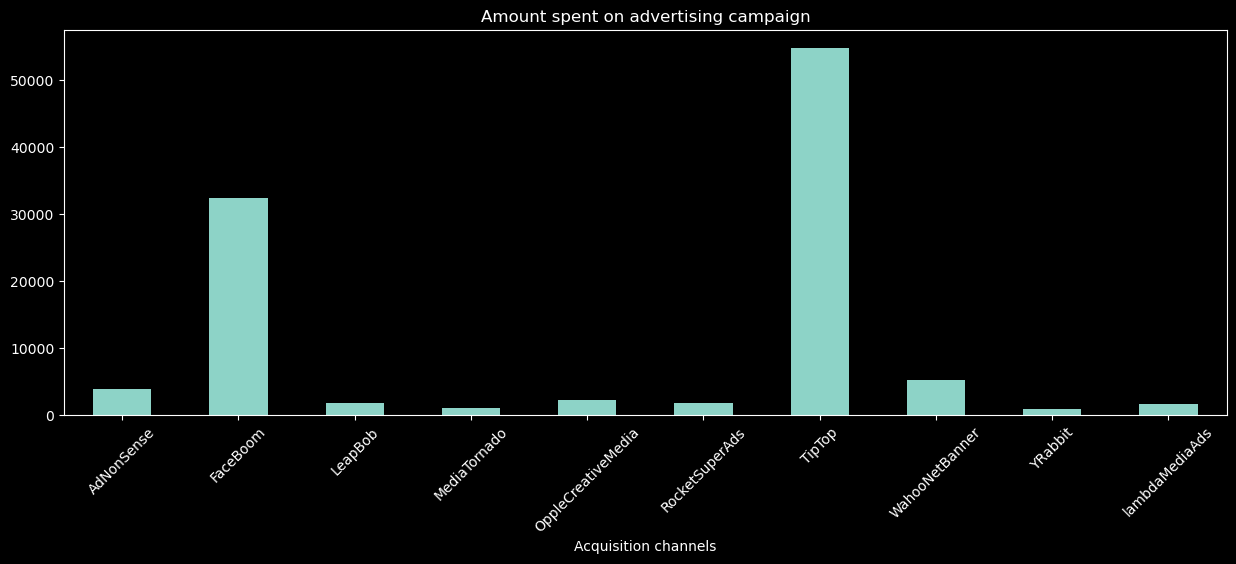

In [62]:
(profiles[profiles.channel != 'organic']
  .groupby('channel')['acquisition_cost']
  .sum().plot(kind='bar', figsize=(15,5)))
plt.title('Amount spent on advertising campaign')
plt.xticks(rotation = 45)
plt.xlabel('Acquisition channels');

In [63]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week

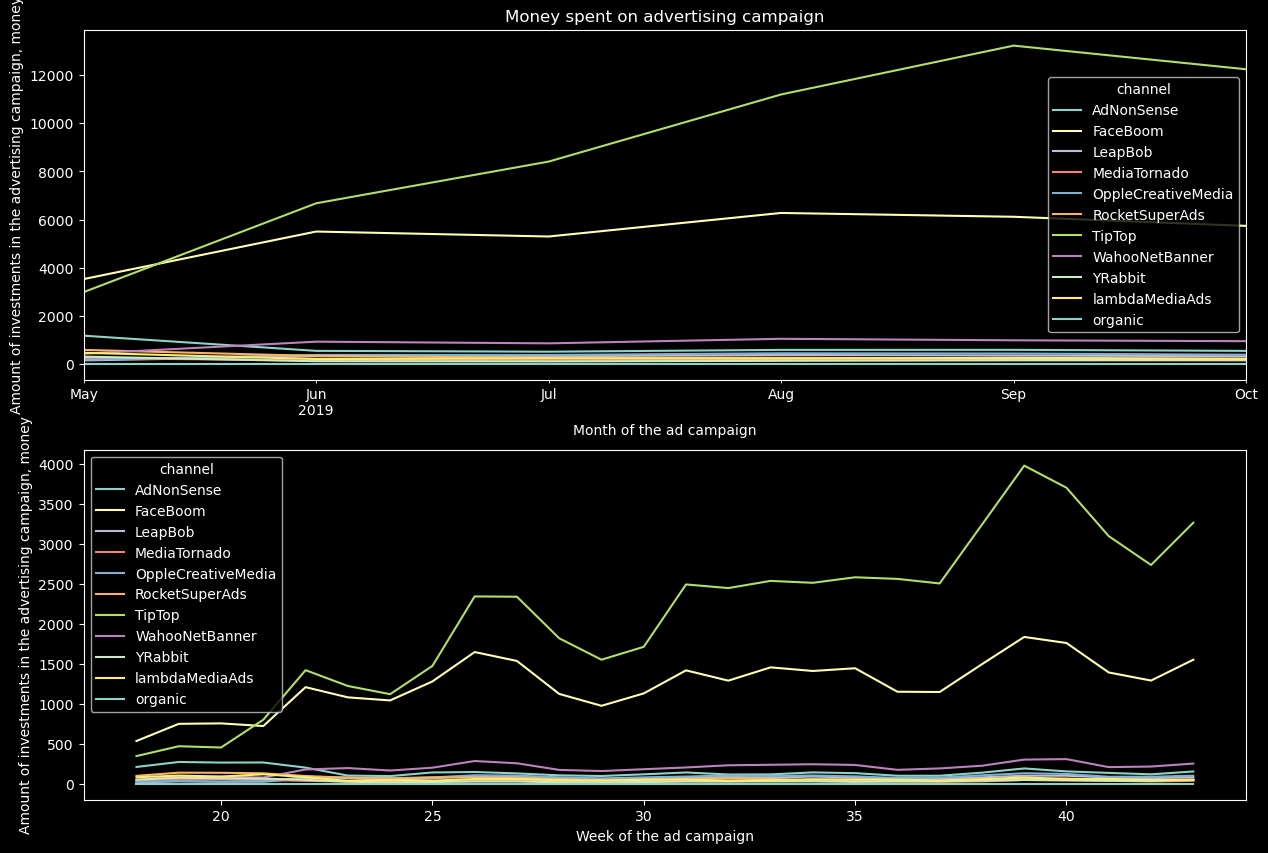

In [64]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 1, 1)
(profiles.sort_values(by='month')
  .pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
  .plot(ax=ax1))
plt.ylabel('Amount of investments in the advertising campaign, money')
plt.xlabel('Month of the ad campaign')
plt.title('Money spent on advertising campaign')
ax2 = plt.subplot(2, 1, 2)
(profiles.sort_values(by='week')
  .pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
  .plot(ax=ax2))
plt.xlabel('Week of the ad campaign')
plt.ylabel('Amount of investments in the advertising campaign, money')
plt.show()

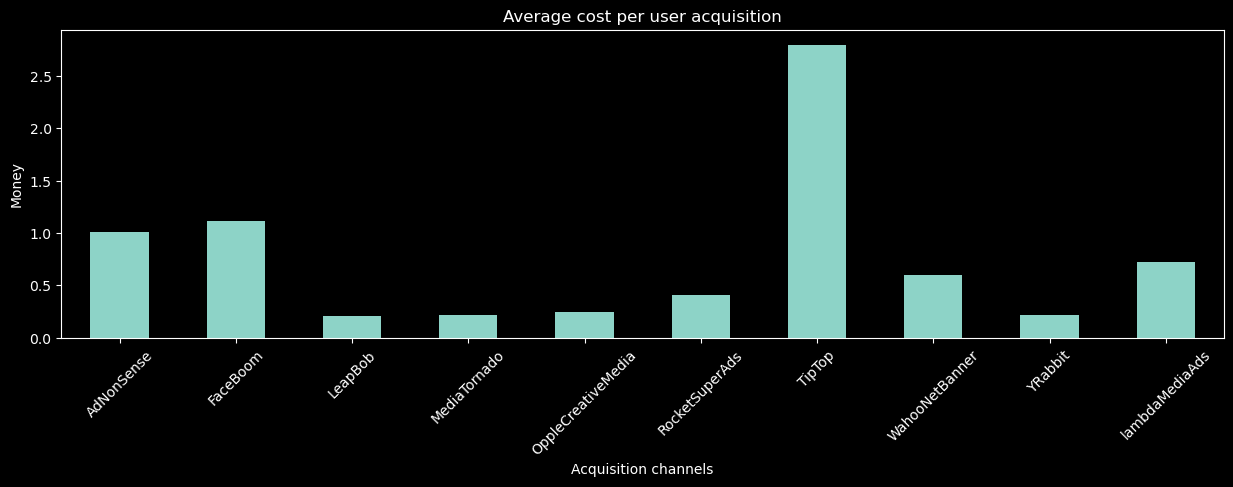

In [65]:
(profiles[profiles.channel != 'organic']
  .groupby('channel')['acquisition_cost']
  .mean().plot(kind='bar', figsize=(15,4)))
plt.title('Average cost per user acquisition')
plt.xlabel('Acquisition channels')
plt.ylabel('Money')
plt.xticks(rotation = 45);

In [66]:
(profiles[profiles.channel != 'organic']
 .groupby('channel')['acquisition_cost']
 .mean()).sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

In [67]:
profiles[profiles.channel != 'organic']['acquisition_cost'].mean()

1.127481323942928

Average CAC was 1.13

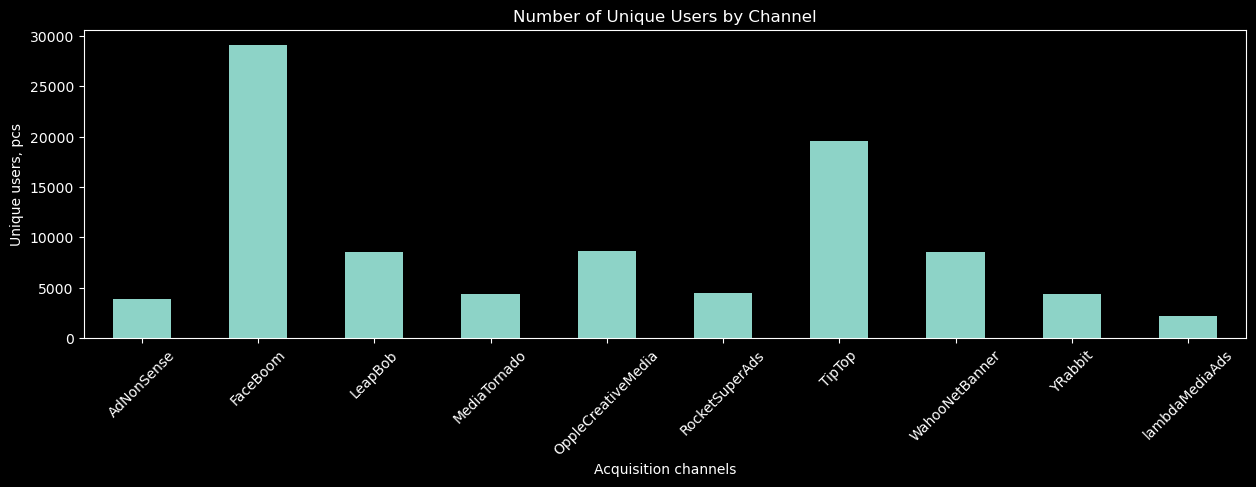

In [68]:
(profiles[profiles.channel != 'organic']
  .groupby('channel')['user_id']
  .nunique().plot(kind='bar', figsize=(15,4)));
plt.title('Number of Unique Users by Channel')
plt.xlabel('Acquisition channels')
plt.ylabel('Unique users, pcs')
plt.xticks(rotation = 45);

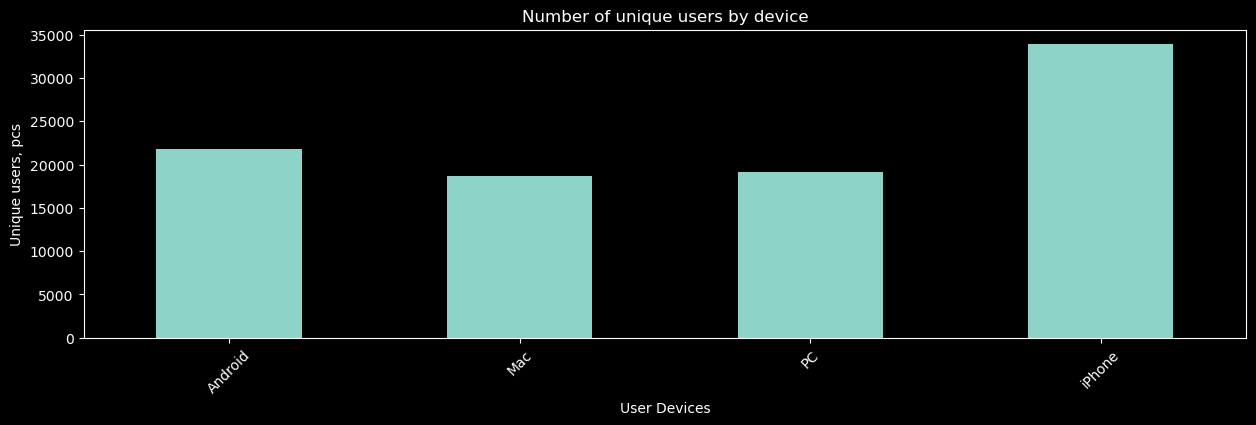

In [69]:
(profiles[profiles.channel != 'organic']
  .groupby('device')['user_id']
  .nunique().plot(kind='bar', figsize=(15,4)))
plt.title('Number of unique users by device')
plt.xlabel('User Devices')
plt.ylabel('Unique users, pcs')
plt.xticks(rotation = 45);

#### The total cost of funds invested in the advertising campaign for the period May-October 2019 is 105497.3 monetary units. The main funds were invested in two channels for acquisitioning users - TipTop (54 thousand banknotes) and FaceBoom - (32 thousand). The peak of advertising campaign financing came in September at the 36th week of the year. The TipTop channel became the most expensive channel to acquisit users - more than 2.5 conventional monetary units per user.

In [70]:
profiles = profiles[profiles.channel != 'organic']

In [71]:
#moment of analysis
observation_date = datetime(2019, 10, 27).date()
horizon_days = 14 # analysis horizon

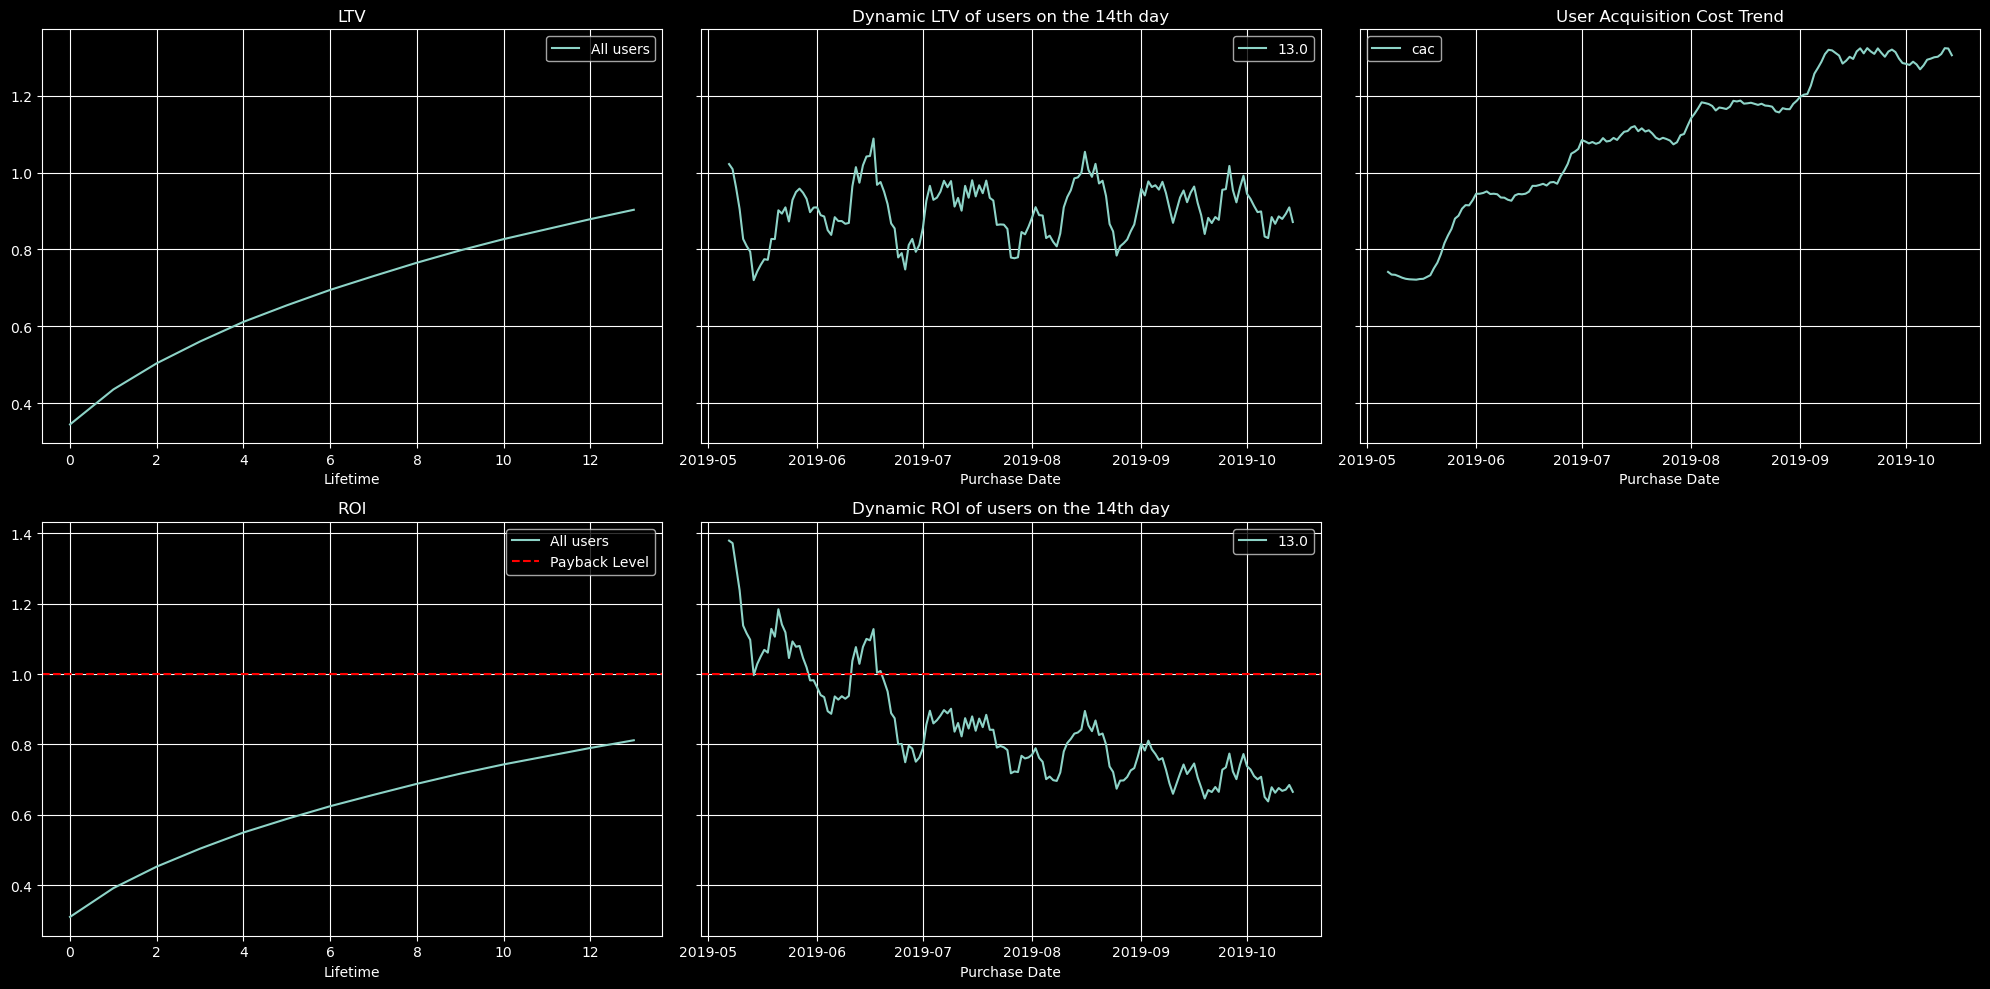

In [72]:
# LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### The graphs show that the cost of acquisitioning one client is constantly growing, a sharp jump in this metric is especially noticeable in the region of the 2nd half of May - early June 2019. The failure of the return on investment curve is just noticeable during this period. Payback at the end of the two-week period was not reached. Payback at the level of 0.8


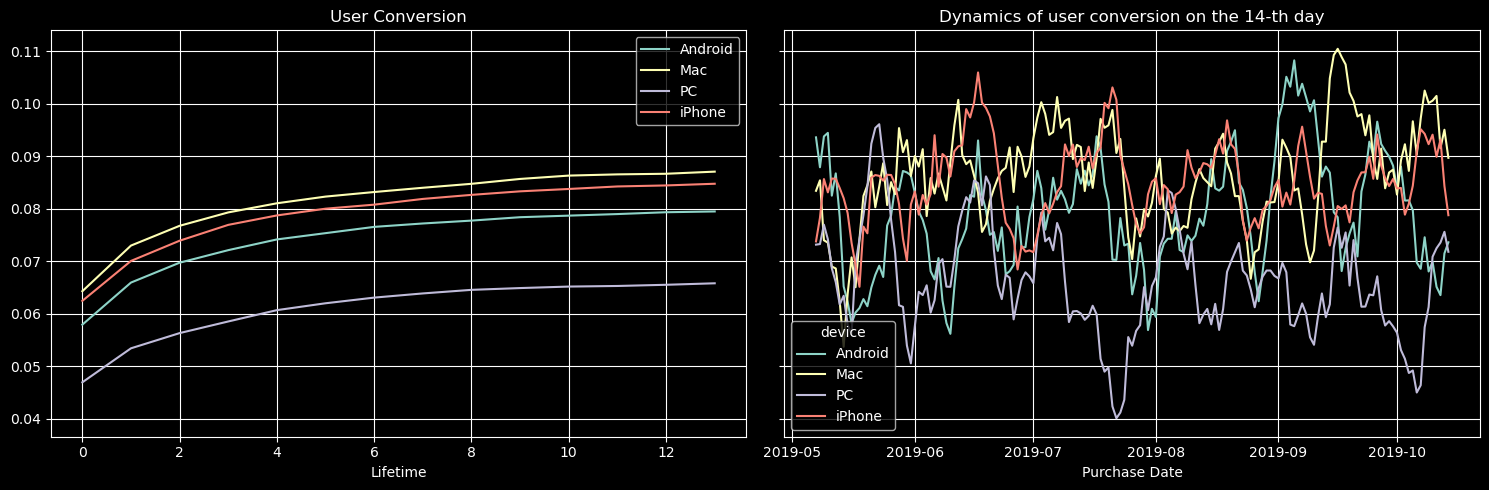

In [73]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

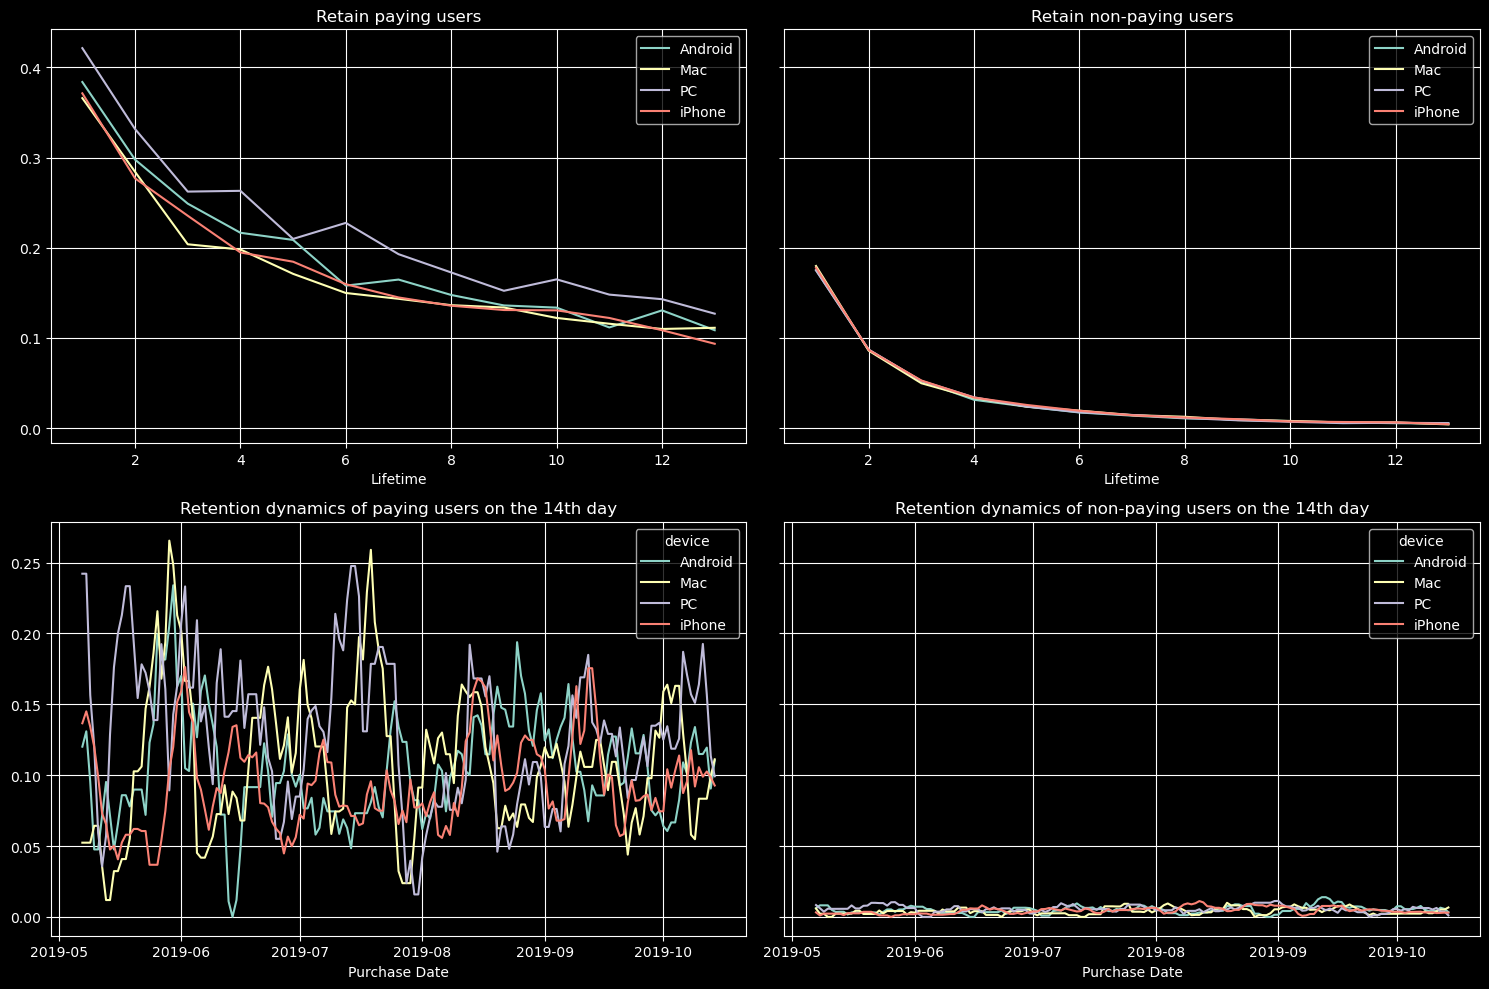

In [74]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В рзарезе по устройствам ничего интересного не вижу, кроме того, что хуже всех конвертируются ПК-бояре.

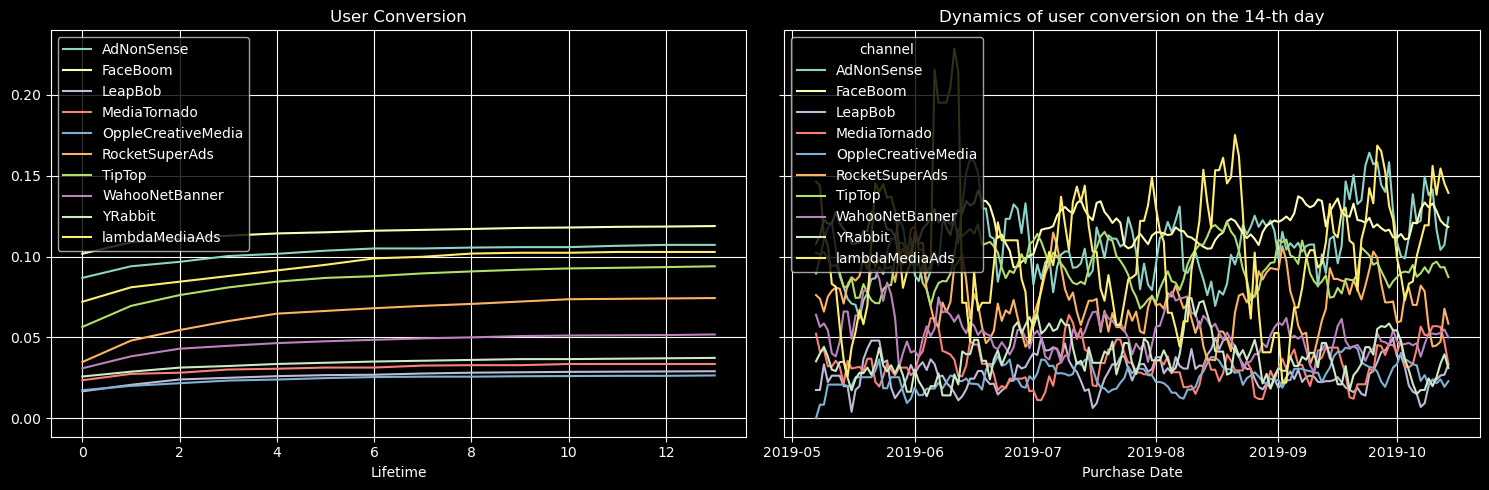

In [75]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

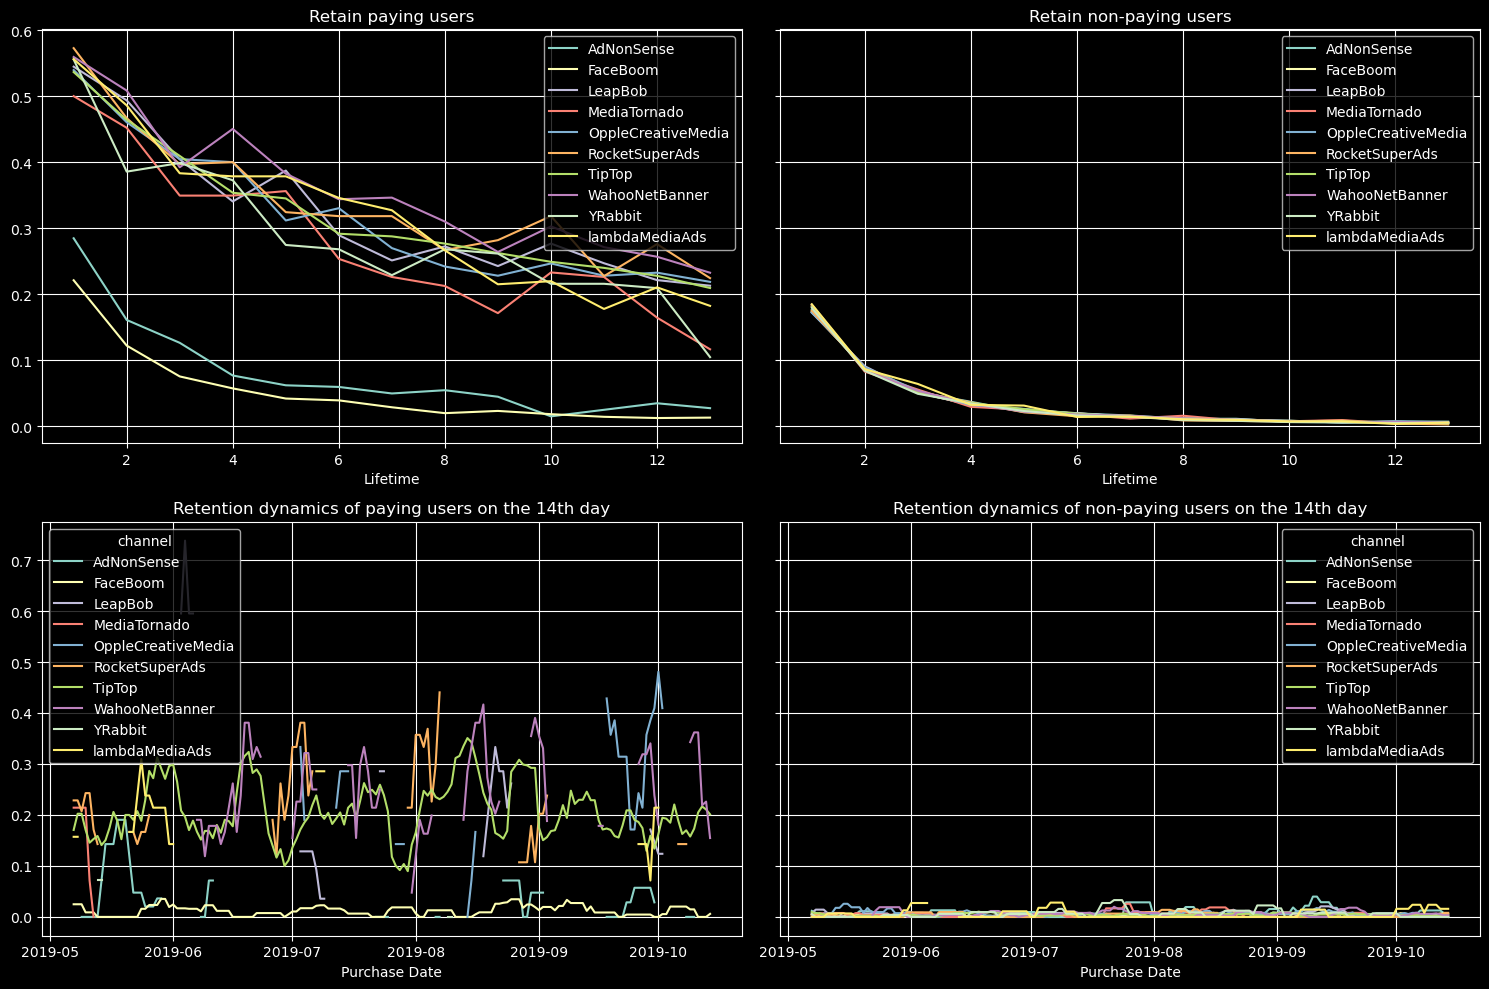

In [76]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Конверсия в разрезе по каналам - Adsense, TikTok, ЛицоКнига в четверке лидеров по этому параметру. Неудержимые  - FaceBoom и Adnonsense. Необходимо рассмотреть возможность увеличения удержания каналов FaceBoom и Adnonsense и присмотреться к каналу lambdamediads, показывающий высокий уровень конверсии (в 3 лидеров). 

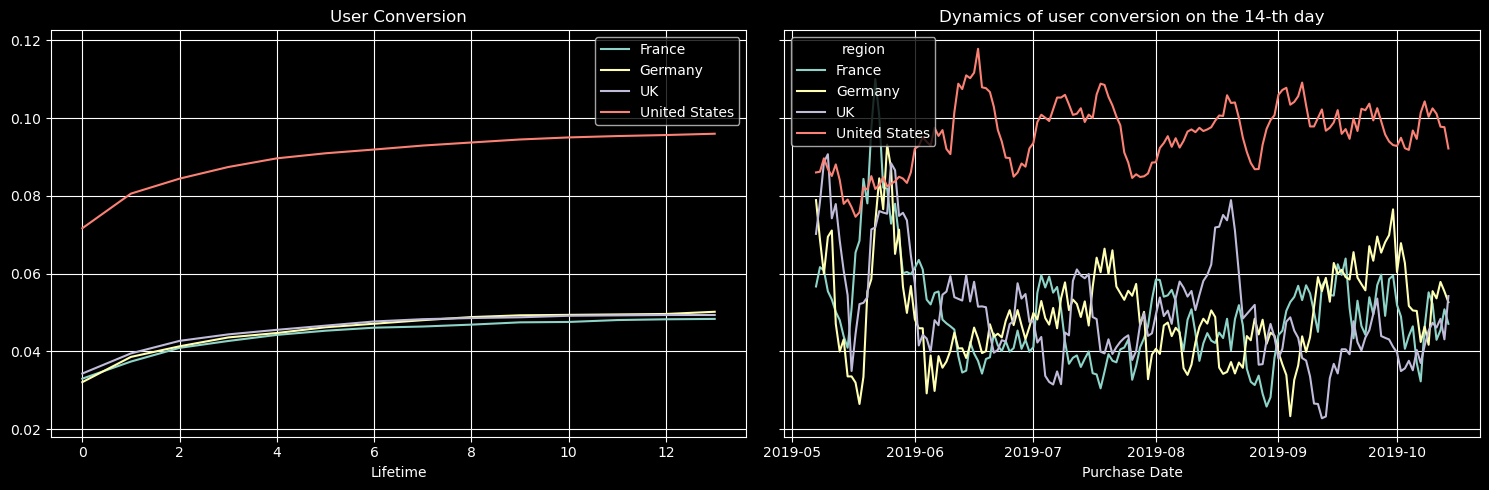

In [77]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

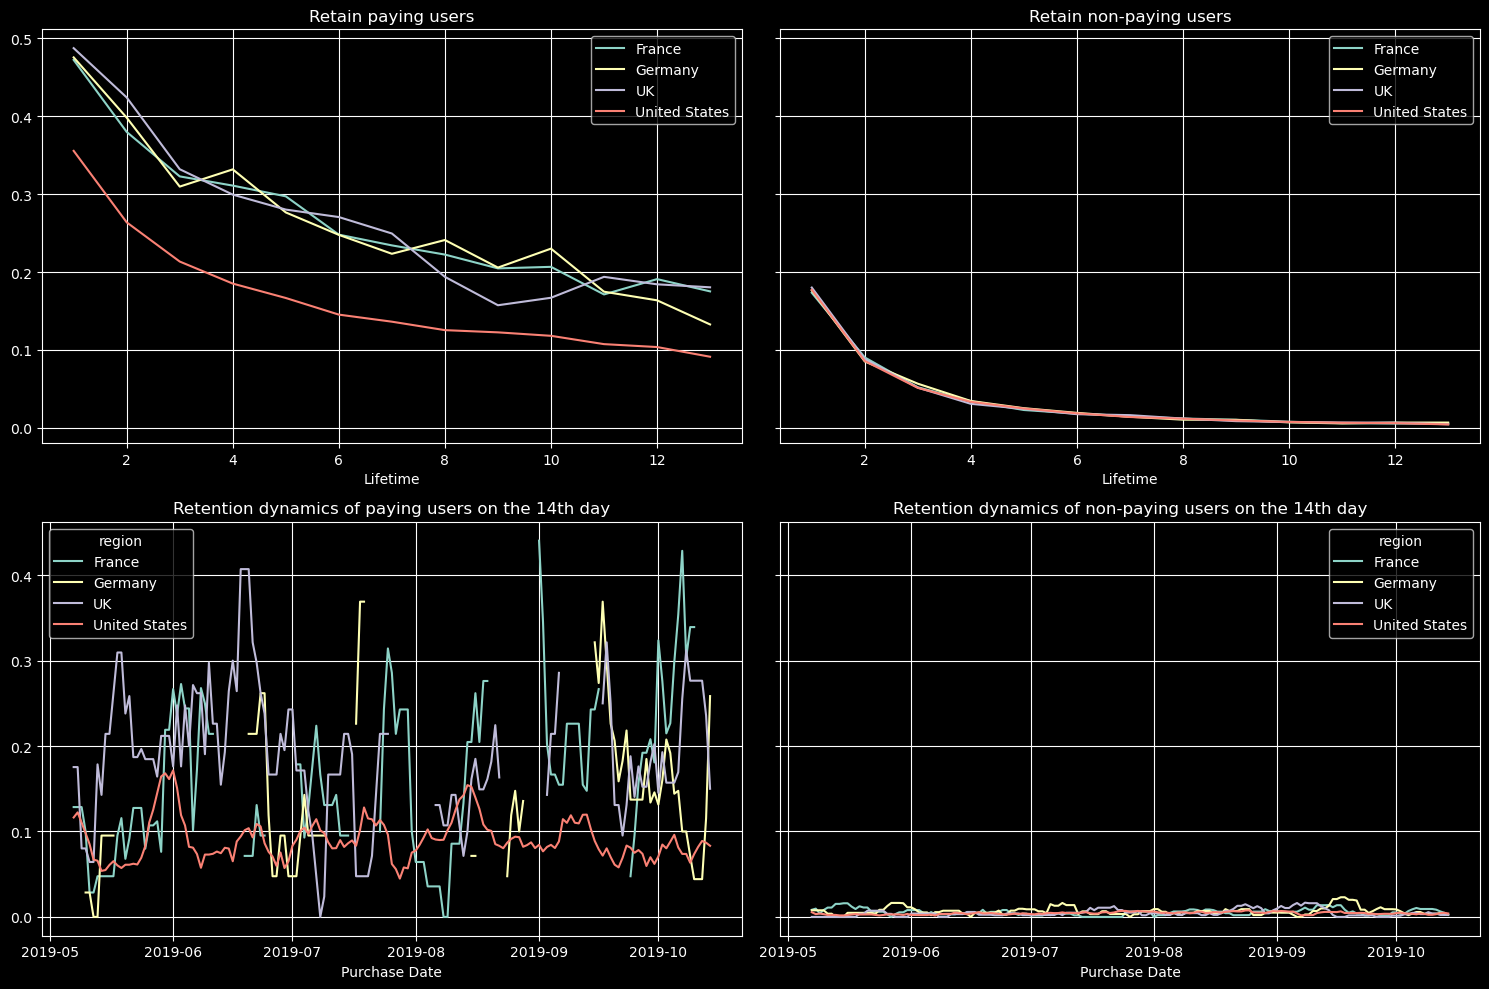

In [78]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### The conversion of users from the US stands out, about 2 times higher than in other regions. Retention in the US is also different, but now noticeably worse, other regions are quite similar in this parameter. This may be the problem.

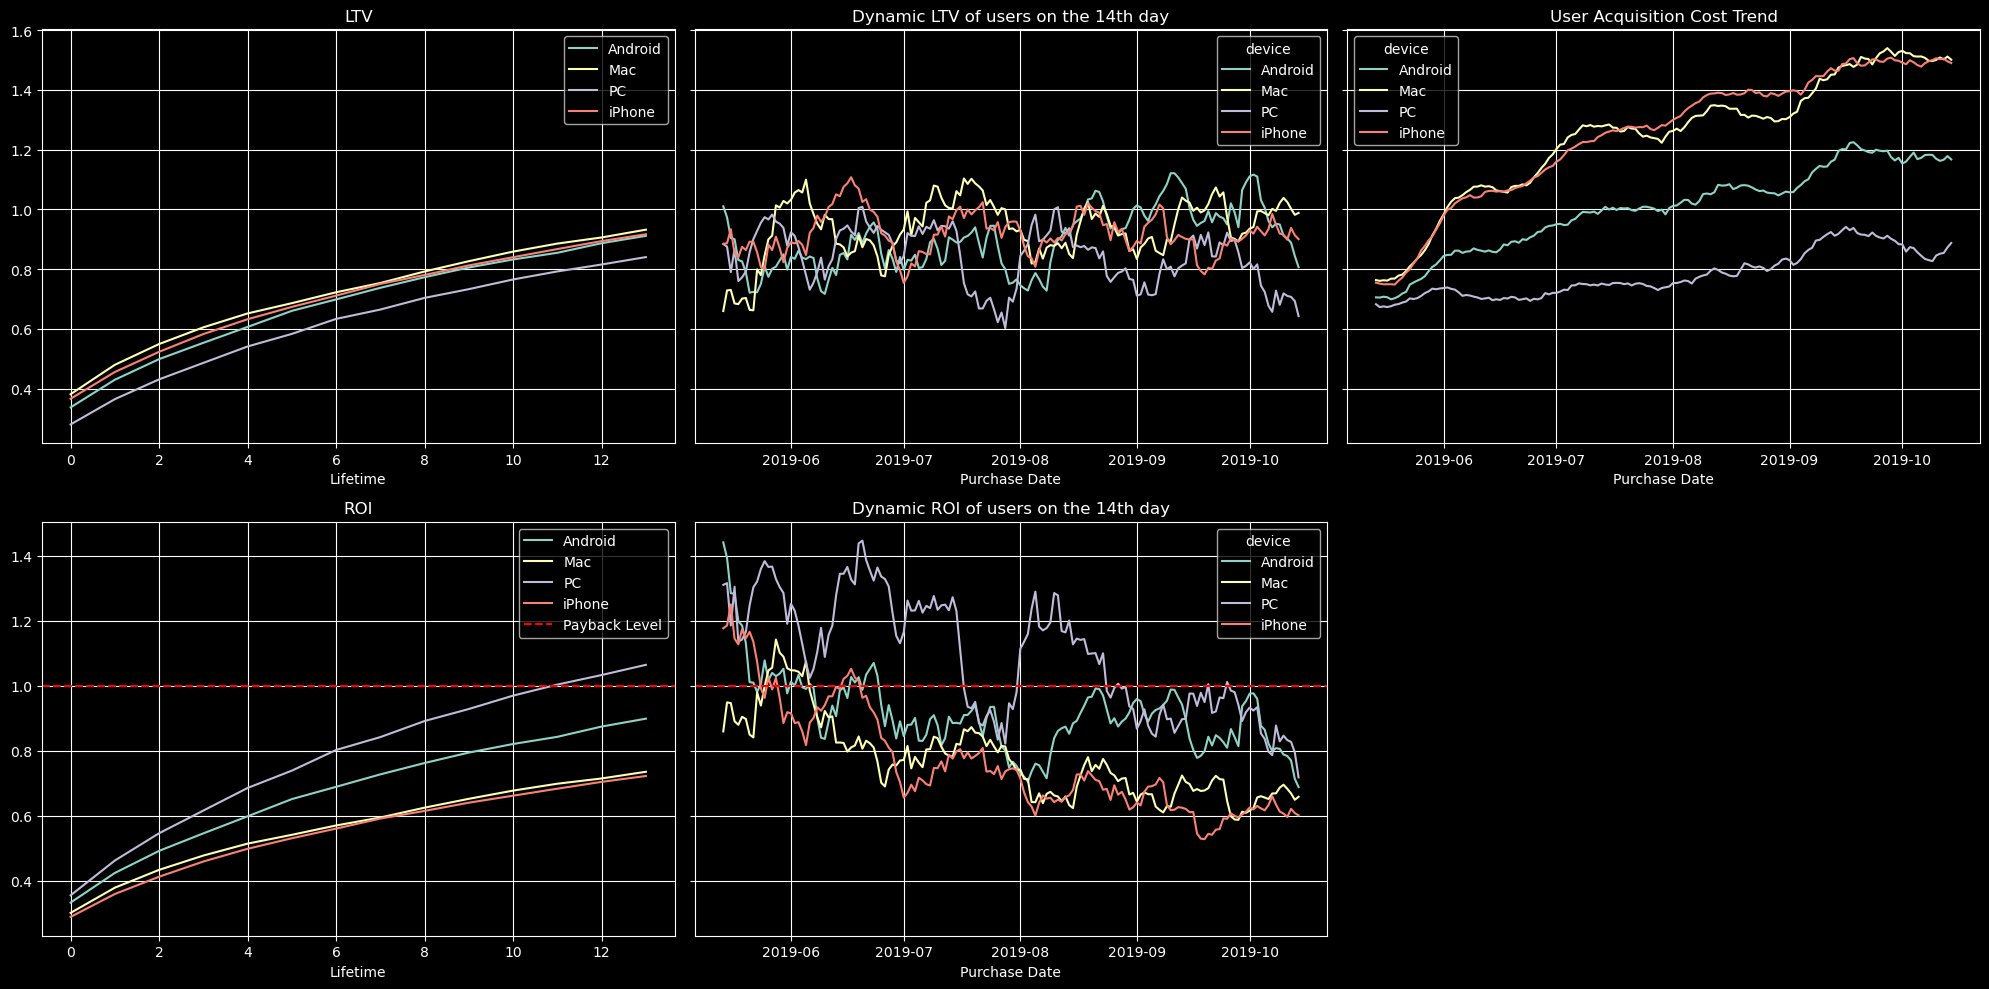

In [79]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### In general, the ROI for IPhone, MAC and now Android devices does not reach the payback level, the dynamics of this indicator on the 14th day shows its fading by the end of the study period. Dynamics of CAC for IPhone, MAC devices is clearly much higher relative to other devices (more than 30% by the end of the study period)

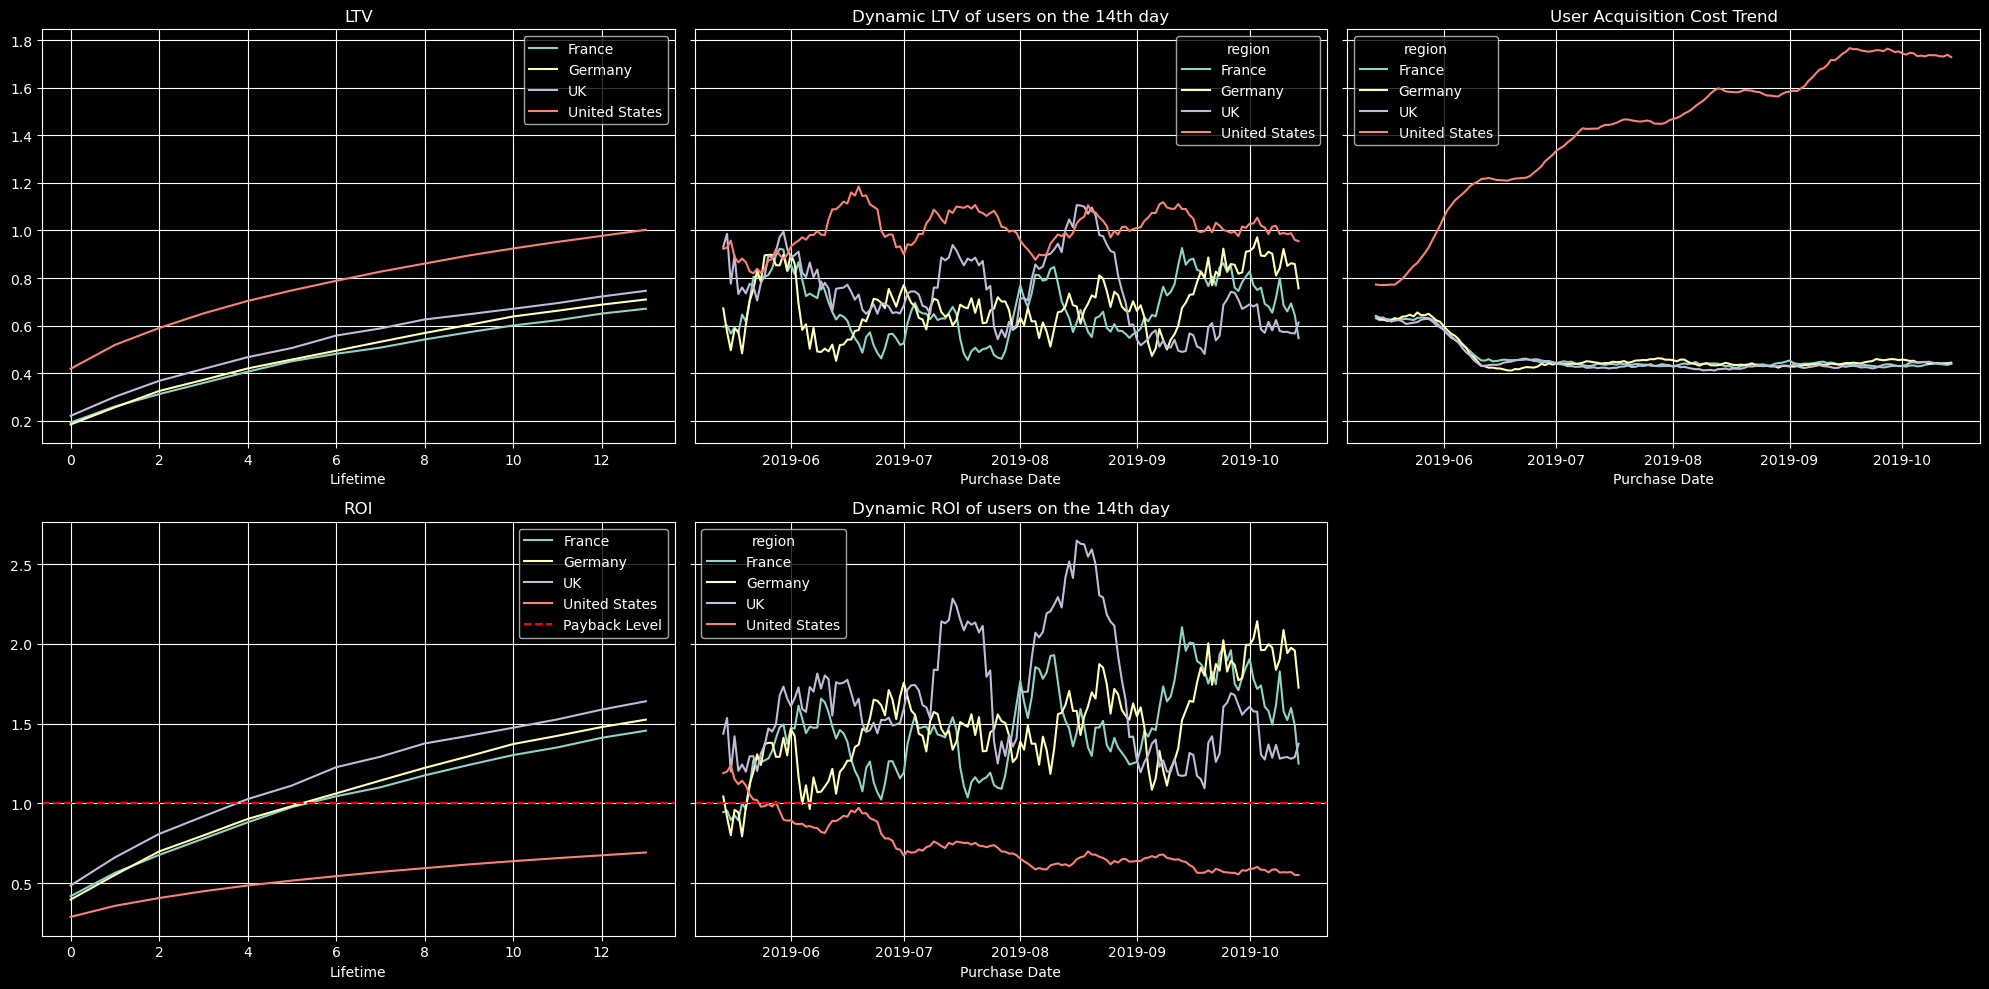

In [80]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### According to the dynamics of the cost of acquisitioning users, and, it seems to me, equally in terms of investment in advertising, the US region is the clear leader, the other three regions are very similar in this indicator. The regions of Germany, UK, France come to payback on the 4th-5th day of lifetime, but only the US is not the leader in terms of investments in the advertising campaign (although they are leaders in terms of LTV). The US region was oversaturated with funds to acquisit users. The lion's share of the advertising budget was distributed to the above region.

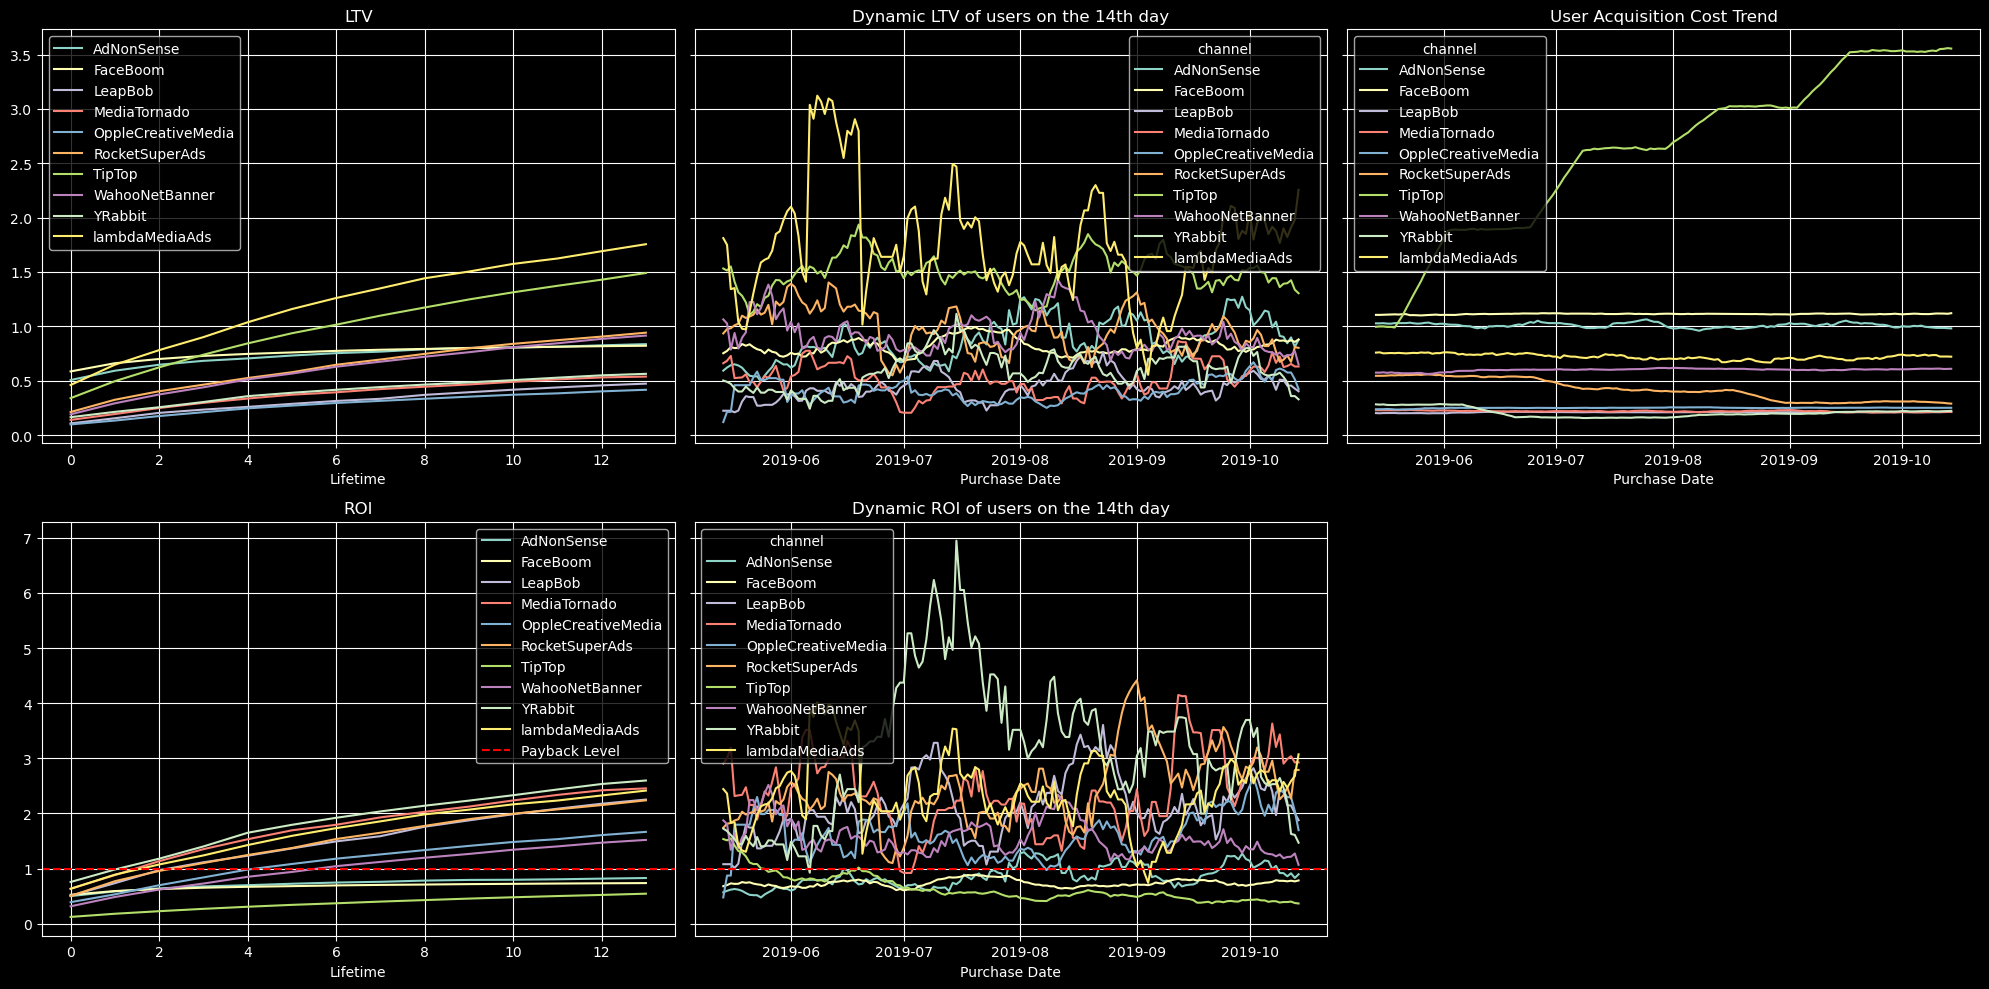

In [81]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### The following channels show themselves ineffective - Adnonsense, TipTop, FaceBoom. The CAC parameter is steadily growing for the TipTop channel, while for the rest of the channels an almost straight line is noticeable over the entire period.

#### The graphs show that the cost of acquisitioning one client is constantly growing, a sharp jump in this metric is especially noticeable in the region of the 2nd half of May - early June 2019. The failure of the return on investment curve is just noticeable during this period. Payback at the end of the two-week period was not reached. Payback at the level of 0.8

#### In general, the ROI for IPhone, MAC and now Android devices does not reach the payback level, the dynamics of this indicator on the 14th day shows its fading by the end of the study period. The dynamics of CAC for IPhone, MAC devices is clearly much higher relative to other devices (by more than 30% by the end of the study period).

#### In my opinion, obvious miscalculations in marketing are observed with targeting advertising by region (the problem is in focusing on the US market) and channels to acquisit users. The advertising campaign was skewed to acquisit users from the US region and the TipTop platform.